<a href="https://colab.research.google.com/github/RajeshMTRA/ml-projects/blob/main/CNN__Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES**

In [ ]:
# sequential API to create models
from keras.models import Sequential

#components to create models
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten

#stochastic gradient descent algorithm, for optimization
from keras.optimizers import SGD

# keras already hosted MNIST dataset (sample dataset, digited; 0 to 9) for us
from keras.datasets import mnist

# an keras utility to binarize integers
from keras.utils import to_categorical

# an keras utility to plot model graph
from keras.utils import plot_model

# ML library with utility for image operation
import skimage

# will use only two of its utilities
from skimage.io import imshow

# another python library to plot things
import matplotlib.pyplot as plt

# another python library to manipulate vector, matrices, array etc
import numpy as np


# **hyper parameters**

In [ ]:
# splitting dataset into batches
batch_size = 128

#numbers of labels in dataset
nb_classes = 10        # digits varying from 0 to 9

# number of times we want to train the model
nb_epoch = 10

# **load data**

In [ ]:
# load mnist dataset
# data split into two sub set: train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **data statistics**

In [ ]:
print("number of training samples: ", len(x_train))
print("number of associated labels: ", len(y_train))

number of training samples:  60000
number of associated labels:  60000


In [ ]:
print("shape of training data: ", x_train.shape)

shape of training data:  (60000, 28, 28)


In [ ]:
print("data type of training samples: ", x_train.dtype)

data type of training samples:  uint8


In [ ]:
print("number of test samples: ", len(x_test))
print("number of associated labels: ", len(y_test))

number of test samples:  10000
number of associated labels:  10000


In [ ]:
print("shape of training labels: ", y_train.shape)
print("shape of test data: ", x_test.shape)
print("type of test data: ", x_test.dtype)
print("shape of test labels: ", y_test.shape)

shape of training labels:  (60000,)
shape of test data:  (10000, 28, 28)
type of test data:  uint8
shape of test labels:  (10000,)


# **visualize data**

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
a_random_sample = x_train[0]
a_random_sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

<ipython-input-11-caced31441ec>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(random_img)


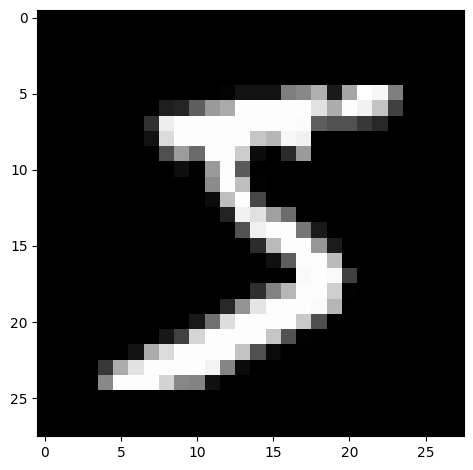

In [ ]:
random_img = x_train[0]

# displaying it
imshow(random_img)

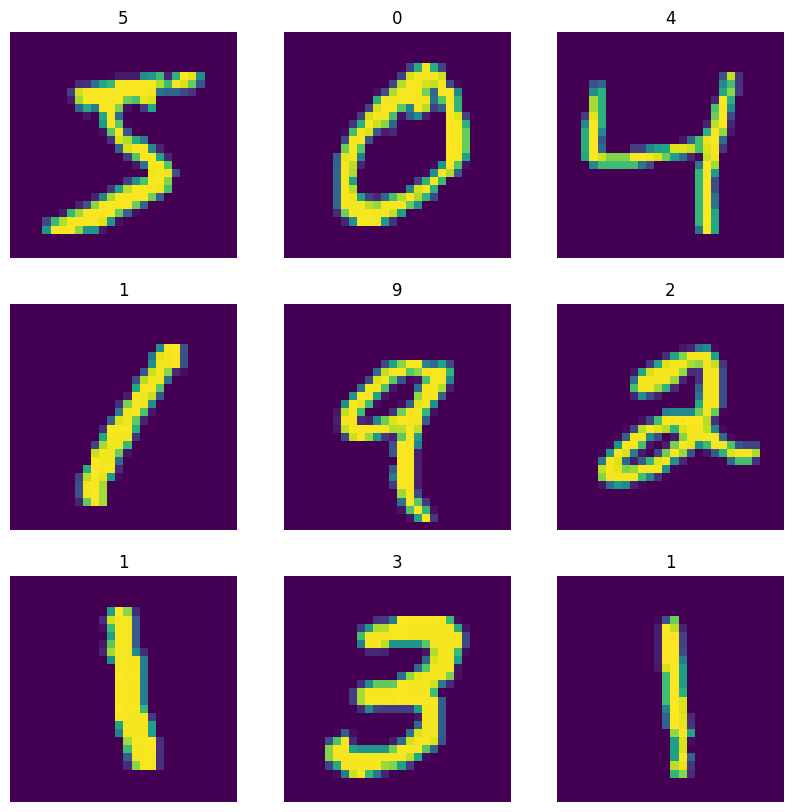

In [ ]:
plt.figure(figsize=(10,10))

# to plot 10 images from dataset
for i in range(9):
  ax = plt.subplot(3, 3, i+1)

  # get a sample at index i
  an_image = x_train[i]

  # display the image
  plt.imshow(an_image)

  # display the label of the sample as title
  plt.title(int(y_train[i]))

  plt.axis("off")

## **In CNN, we use image as input directly to do convolution operation, unlike neural network. So, no need to reshape and flatten data.**

# **changing data type of training and test data**

In [ ]:
print("previous data types of training and test samples:")
print(x_train.dtype)
print(x_test.dtype)

# change data type of training and test data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("new data types of training and test samples:")
print(x_train.dtype)
print(x_test.dtype)

previous data types of training and test samples:
uint8
uint8
new data types of training and test samples:
float32
float32


# **re-scaling data**

In [ ]:
a_sample = x_train[0]

print("min value of sample: ", a_sample.min())
print("max value of sample: ", a_sample.max())

min value of sample:  0.0
max value of sample:  255.0


In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
a_sample = x_train[0]

print("min value of sample: ", a_sample.min())
print("max value of sample: ", a_sample.max())

min value of sample:  0.0
max value of sample:  1.0


# **Reshape train and test data to 4D**

becauuse Conv2D can't receive data without four dimension

In [ ]:
# make sure images has shape (28,28,1)
# here 1 means channel dimension, for the images are grayscale. If the images were RGB, this channel dimension would be 3.

# to expand a dimension at the end (at last index)
x_train = np.expand_dims(x_train, -1) # here -1 denotes last index, as the dimension will be added at the end

# if it would be a colorful image, we would not have to do it

# similarly
x_test = np.expand_dims(x_test, -1)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)


# **Binarize labels (also same as FCNN)**

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

In [ ]:
# apply to_categorical to train labels
y_train = to_categorical(y_train, nb_classes)

# apply to_categorical to test labels
y_test = to_categorical(y_test, nb_classes)

# **Define model**

In [ ]:
# define a input shape for CNN
input_shape = (28,28,1)

In [ ]:
# keras provides sequential API to create models
model = Sequential()

# define the input layer
model.add(Input(shape=input_shape))

# 1st conv layer
model.add(Conv2D(32, kernel_size =(3,3), activation="relu")) # 32--> number of fetures we want to extract from a input image (32 slices)

# 1st pooling layer (width and height will be down sampled)
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd conv layer
model.add(Conv2D(64, kernel_size =(3,3), activation="relu"))

# 2nd pooling layer (width and height will be down sampled)
model.add(MaxPooling2D(pool_size=(2,2)))

# next layer is dense layer, so now we have to flatten the 4D tensor to 1D
model.add(Flatten())

# last dense layer to make classification
model.add(Dense(nb_classes, activation="softmax"))

# **compile model (same as FCNN)**

In [ ]:
# choosing learning rate
learning_rate = 0.001

# choose optimizer
optimizer=SGD(learning_rate = learning_rate)

# select loss function (or cost function)
loss='categorical_crossentropy'  # specifically for multiclass classification

# select evaluation metrics
metrics=['accuracy']

# model compilation
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# **visualize model, same as FCNN**

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

No learnanle parameters in maxpooling, only down sampling takes place.

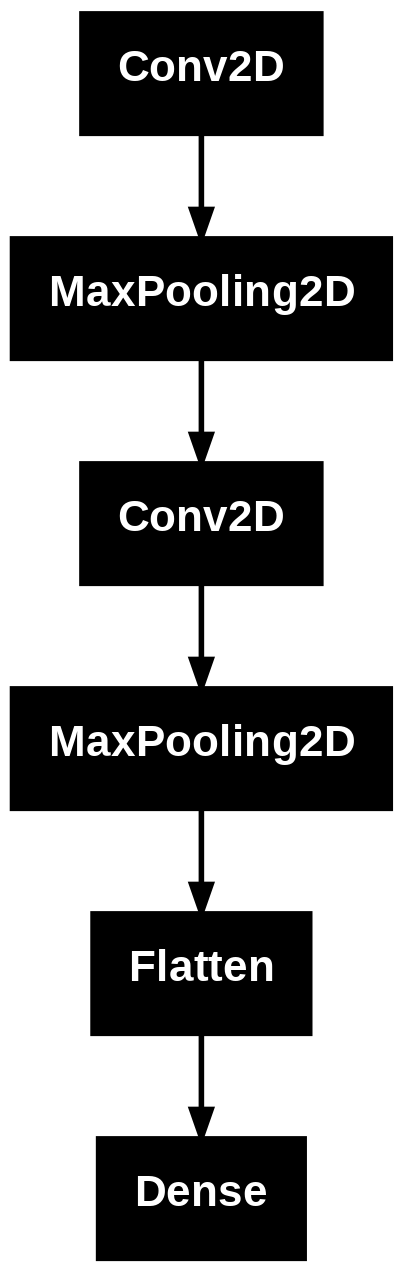

In [ ]:
plot_model(model)

# **model training, same as FCNN**


In [ ]:
# train
history = model.fit(x_train, y_train, epochs=nb_epoch, batch_size=batch_size)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 128ms/step - accuracy: 0.1553 - loss: 2.2910
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 107ms/step - accuracy: 0.3582 - loss: 2.1967
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.6080 - loss: 2.0262
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 98ms/step - accuracy: 0.6891 - loss: 1.6519
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.7621 - loss: 1.1181
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.8126 - loss: 0.7738
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.8441 - loss: 0.6080
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 101ms/step - accuracy: 0.8616 - loss: 0.5207
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 103ms/step - accuracy: 0.8717 - loss: 0.4671
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.8801 - loss: 0.4311


# **Inference, same as FCNN**

In [ ]:
#EVALUATE
evaluation = model.evaluate(x_test, y_test)
# model will receive test data, generate some predictions, and compare them with y_test

# display test statistics
print('summary: loss over the test dataset: %.2f, accuracy: %.2f' % (evaluation[0]*100, evaluation[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8741 - loss: 0.4342
summary: loss over the test dataset: 38.51, accuracy: 89.41


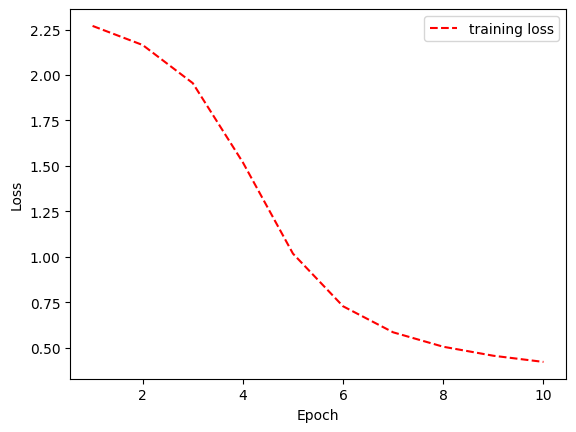

In [ ]:
# get training loss histories
training_loss = history.history['loss']

# create count of the number of epochs
epoch_count = range(1, len(training_loss)+1)

# visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['training loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

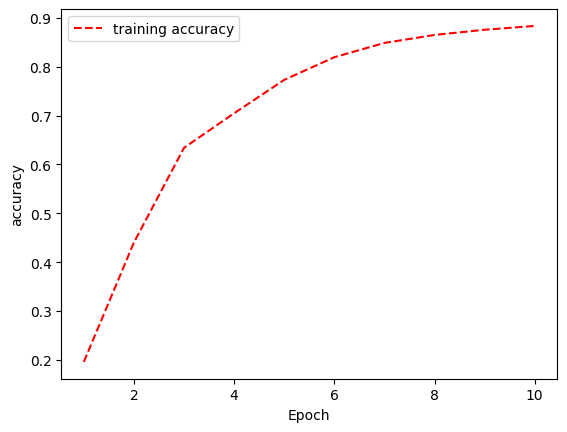

In [ ]:
# get training accuracy histories
training_accuracy = history.history['accuracy']

# create count of the number of epochs
epoch_count = range(1, len(training_loss)+1)

# visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.legend(['training accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show();